# Forecasting- cola

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1AB3-C3C9

 Directory of C:\Users\AANANTHA PRIYA S M\Desktop\resend ass\remail\New folder\remail\ass18

04-04-2023  19:28    <DIR>          .
04-04-2023  11:52    <DIR>          ..
04-04-2023  12:05    <DIR>          .ipynb_checkpoints
07-03-2023  19:19             9,559 Airlines+Data.xlsx
04-04-2023  18:17           187,587 assignment 18(Cola).ipynb
04-04-2023  11:57           163,459 assisgnment 18 -(forecasting- cola).ipynb
16-03-2023  17:34           188,175 assisgnment 18(airline).ipynb
07-03-2023  19:19             9,422 CocaCola_Sales_Rawdata.xlsx
16-03-2023  14:27               781 dataset_cc.csv
07-03-2023  19:19               233 Problem_statement.txt
04-04-2023  19:28           126,260 resend cola.ipynb
16-03-2023  14:27                98 validation_cc.csv
               9 File(s)        685,574 bytes
               3 Dir(s)  43,407,929,344 bytes free


In [3]:
cola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",sheet_name='Sheet1')
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
cola.shape

(42, 2)

In [5]:
cola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
cola.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [9]:
cola['Quarter_Year'] = cola['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
cola.head(10)

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [10]:
cola['Quarters'] = 0

for i in range(42):
    n = cola['Quarter'][i]
    cola['Quarters'][i] = n[0:2]
    
cola.head(10)

,Quarter,Sales,Quarter_Year,Quarters
0,Q1_86,1734.827000,Q1 1986,Q1
1,Q2_86,2244.960999,Q2 1986,Q2
2,Q3_86,2533.804993,Q3 1986,Q3
3,Q4_86,2154.962997,Q4 1986,Q4
4,Q1_87,1547.818996,Q1 1987,Q1
5,Q2_87,2104.411995,Q2 1987,Q2
6,Q3_87,2014.362999,Q3 1987,Q3
7,Q4_87,1991.746998,Q4 1987,Q4
8,Q1_88,1869.049999,Q1 1988,Q1
9,Q2_88,2313.631996,Q2 1988,Q2


In [11]:
cola['Date'] = (pd.to_datetime(cola['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
cola.head(10)

,Quarter,Sales,Quarter_Year,Quarters,Date
0,Q1_86,1734.827000,Q1 1986,Q1,1986-01-01
1,Q2_86,2244.960999,Q2 1986,Q2,1986-04-01
2,Q3_86,2533.804993,Q3 1986,Q3,1986-07-01
3,Q4_86,2154.962997,Q4 1986,Q4,1986-10-01
4,Q1_87,1547.818996,Q1 1987,Q1,1987-01-01
5,Q2_87,2104.411995,Q2 1987,Q2,1987-04-01
6,Q3_87,2014.362999,Q3 1987,Q3,1987-07-01
7,Q4_87,1991.746998,Q4 1987,Q4,1987-10-01
8,Q1_88,1869.049999,Q1 1988,Q1,1988-01-01
9,Q2_88,2313.631996,Q2 1988,Q2,1988-04-01


In [13]:
dummy = pd.DataFrame(pd.get_dummies(cola['Quarters']))
cola1 = pd.concat((cola, dummy), axis=1)
cola1.head()

,Quarter,Sales,Quarter_Year,Quarters,Date,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,Q1,1986-01-01,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,Q2,1986-04-01,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,Q3,1986-07-01,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,Q4,1986-10-01,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,Q1,1987-01-01,1,0,0,0


In [15]:
cola2=cola1[['Quarter','Sales','Quarters','Q1','Q2','Q3','Q4']]
cola2.head()

,Quarter,Sales,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


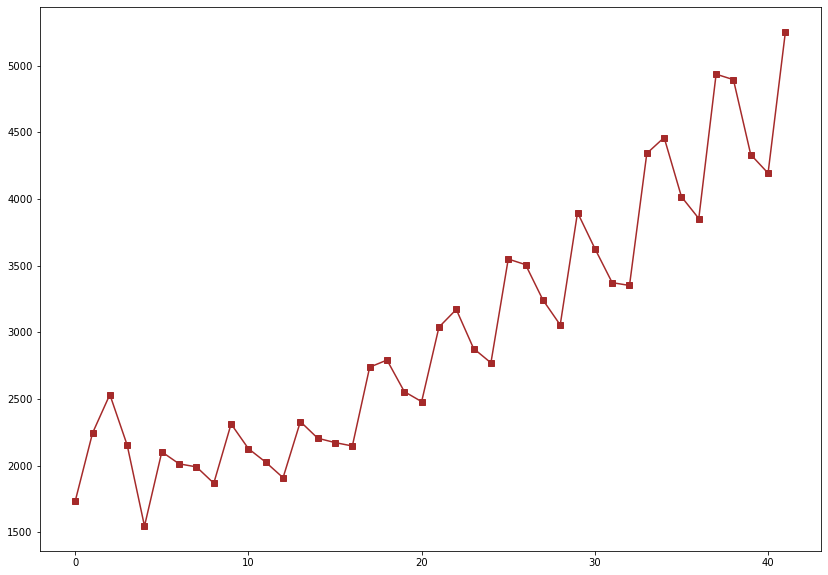

In [17]:
cola1['Sales'].plot(figsize=(14,10), color='brown', marker='s')
plt.show()

In [20]:
cola1["Date"] = pd.to_datetime(cola1.Date,format="%b-%y")
cola1["month"] = cola1.Date.dt.strftime("%b") # month extraction
cola1["year"] = cola1.Date.dt.strftime("%Y") # year extraction
cola1.head(10)

,Quarter,Sales,Quarter_Year,Quarters,Date,Q1,Q2,Q3,Q4,month,year
0,Q1_86,1734.827000,Q1 1986,Q1,1986-01-01,1,0,0,0,Jan,1986
1,Q2_86,2244.960999,Q2 1986,Q2,1986-04-01,0,1,0,0,Apr,1986
2,Q3_86,2533.804993,Q3 1986,Q3,1986-07-01,0,0,1,0,Jul,1986
3,Q4_86,2154.962997,Q4 1986,Q4,1986-10-01,0,0,0,1,Oct,1986
4,Q1_87,1547.818996,Q1 1987,Q1,1987-01-01,1,0,0,0,Jan,1987
5,Q2_87,2104.411995,Q2 1987,Q2,1987-04-01,0,1,0,0,Apr,1987
6,Q3_87,2014.362999,Q3 1987,Q3,1987-07-01,0,0,1,0,Jul,1987
7,Q4_87,1991.746998,Q4 1987,Q4,1987-10-01,0,0,0,1,Oct,1987
8,Q1_88,1869.049999,Q1 1988,Q1,1988-01-01,1,0,0,0,Jan,1988
9,Q2_88,2313.631996,Q2 1988,Q2,1988-04-01,0,1,0,0,Apr,1988


In [24]:
cola3=cola1[['Date','Sales','Quarters','year','month','Q1','Q2','Q3','Q4']]
cola3.head()

,Date,Sales,Quarters,year,month,Q1,Q2,Q3,Q4
0,1986-01-01,1734.827000,Q1,1986,Jan,1,0,0,0
1,1986-04-01,2244.960999,Q2,1986,Apr,0,1,0,0
2,1986-07-01,2533.804993,Q3,1986,Jul,0,0,1,0
3,1986-10-01,2154.962997,Q4,1986,Oct,0,0,0,1
4,1987-01-01,1547.818996,Q1,1987,Jan,1,0,0,0


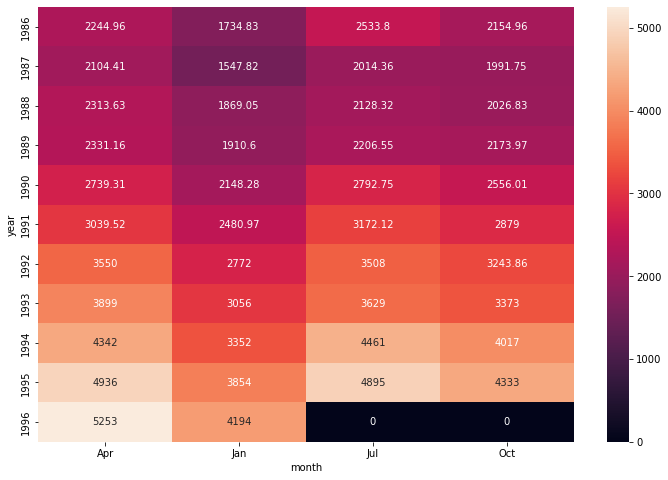

In [25]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cola3, values="Sales", index="year", columns="month", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt="g")
plt.show()

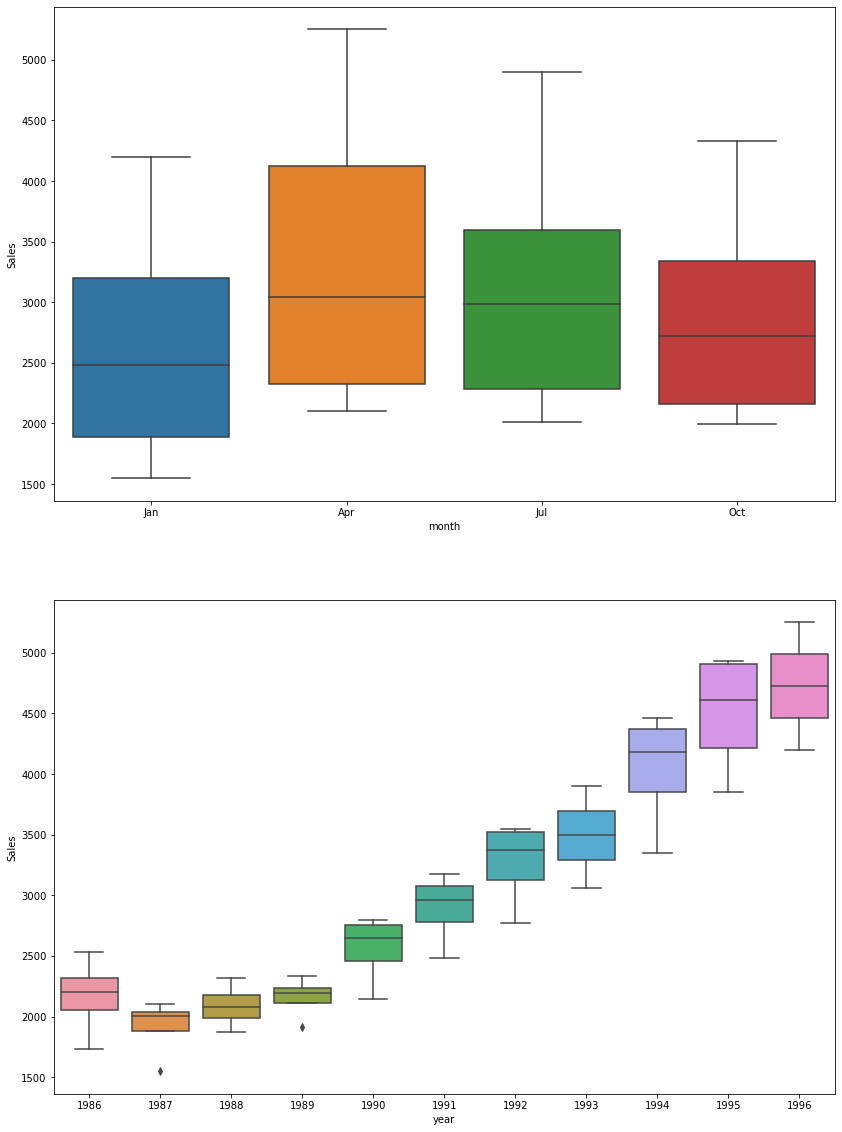

In [27]:
#outliers
plt.figure(figsize=(14,20))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=cola3)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=cola3)
plt.show()

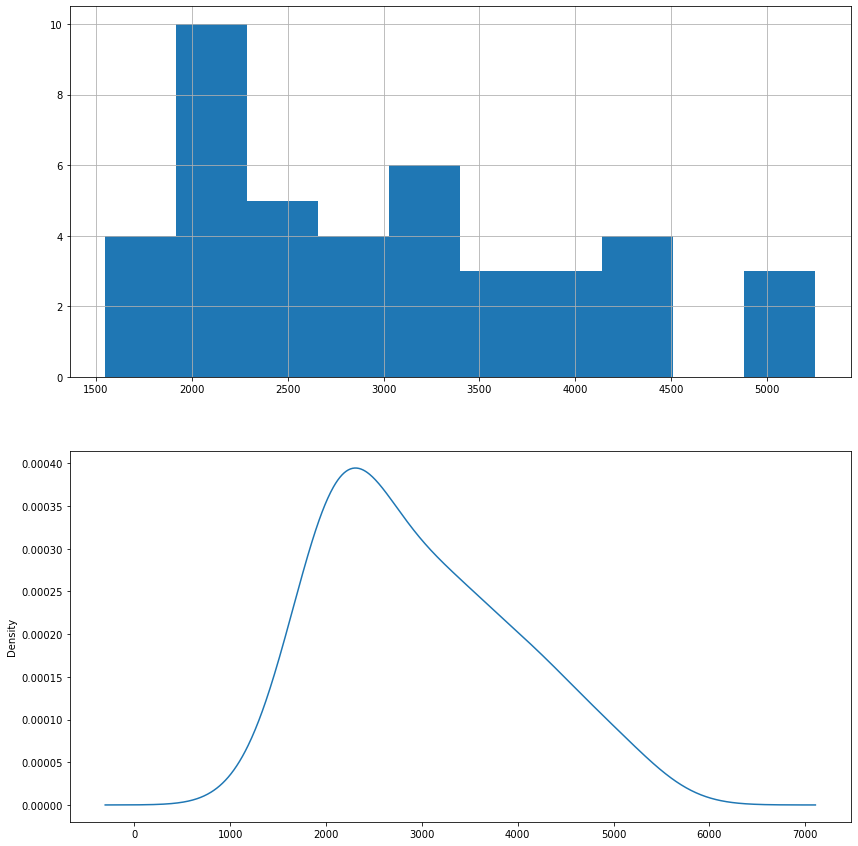

In [28]:
#histogram
plt.figure(figsize=(14,15))
plt.subplot(211)
cola3.Sales.hist()
plt.subplot(212)
cola3.Sales.plot(kind='kde')
plt.show()

In [ ]:
#Square & log

In [30]:
cola2['t'] = np.arange(1,43)
cola2['t_squared'] = cola2['t']**2
cola2["Sales_log"] =np.log(cola['Sales'])
cola2

,Quarter,Sales,Quarters,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


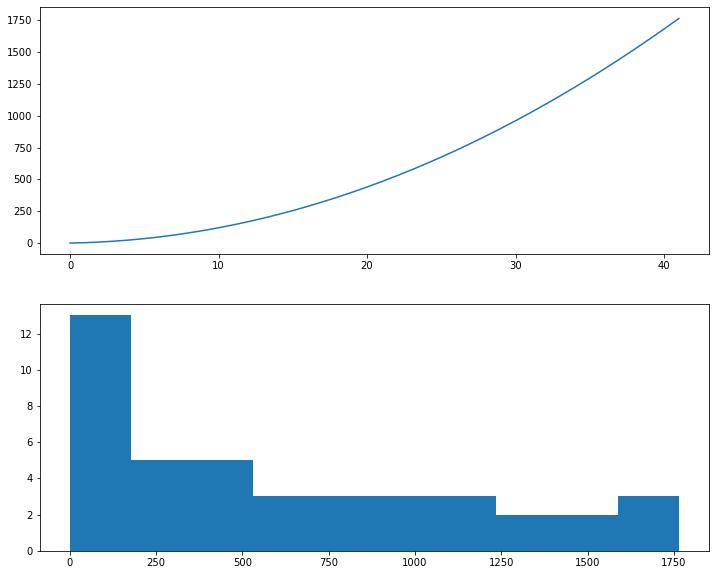

In [34]:
# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(cola2['t_squared'])

# Histogram
plt.subplot(212)
plt.hist(cola2['t_squared'])
plt.show()

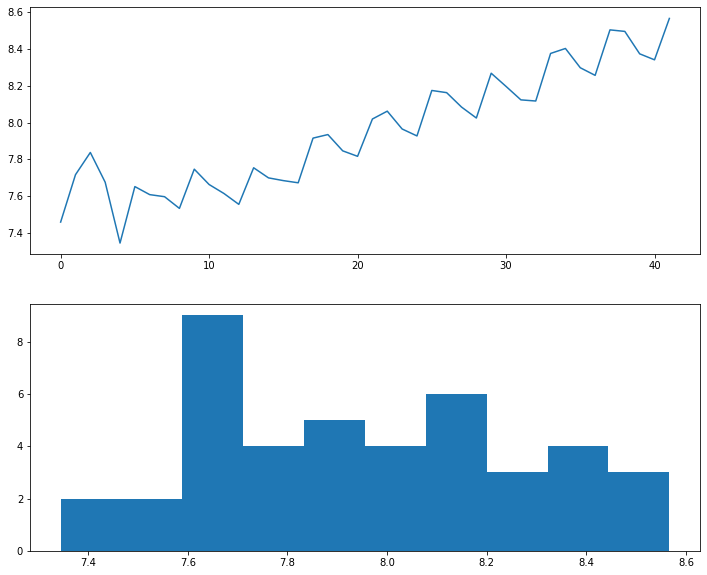

In [35]:
# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(cola2['Sales_log'])

# Histogram
plt.subplot(212)
plt.hist(cola2['Sales_log'])
plt.show()

In [36]:
train =cola2.head(32)
test =cola2.tail(10)

In [37]:
len(cola3['Sales'])

42

# Model


In [38]:
from sklearn.metrics import mean_squared_error

# (1) Linear Model

In [39]:
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767121

# (2)Quadratic Model

In [40]:
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.7357355407437

# (3)Exponential model

In [41]:
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [42]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


# Using ARIMA model

In [43]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [44]:
#separate out a validation dataset
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [45]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [46]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [47]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [48]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [49]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


The least RMSE values has the RMSE_ARMIA model and we can final this model¶